In [2]:
import os
import glob
from shapely.geometry import Point, LineString, Polygon
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterstats import zonal_stats

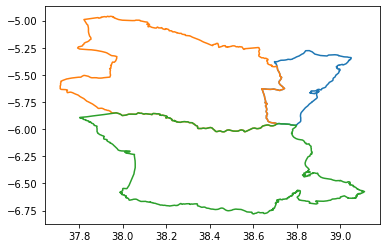

In [3]:
#set environmenents and folder structure
#name_of_folder = os.chdir(./lab2/lab2_data/data')
filenames = glob.glob('./data/districts/*')
districts = {'district':[], 'num_coords':[], 'geometry':[]}
for x in filenames:
    polyname = 'dist'+x[-10:-4]
    data = pd.read_csv(x, delim_whitespace=True)
    #create a tuple to hold the coordinates
    coordlist = list(zip(data["X"],data["Y"]))
    #create polygon
    poly = Polygon(coordlist)
    #use matplotlib to plot exterior polygon tuples
    x,y = poly.exterior.xy
    shps = plt.plot(x,y)
    #create and populate fields (num_coords and districts) with a geodataframe created from dictionaries 
    dist_num = districts['district'].append(polyname)
    districts['num_coords'].append(len(coordlist))
    districts['geometry'].append(poly)

In [4]:
districts_gdf= gpd.GeoDataFrame.from_dict(districts)
print(districts_gdf)
districts_gdf.crs = "EPSG:4326"
print(districts_gdf.crs)
print(districts_gdf.dtypes)
districts_gdf.to_file(driver = 'ESRI Shapefile', filename= "districts.shp")

     district  num_coords                                           geometry
0  district05         566  POLYGON ((39.04198 -5.36686, 39.04034 -5.36935...
1  district06        1223  POLYGON ((38.72445 -5.50916, 38.72850 -5.51931...
2  district01        1847  POLYGON ((39.07757 -6.61146, 39.07505 -6.61193...
EPSG:4326
district        object
num_coords       int64
geometry      geometry
dtype: object


In [5]:
rastorfiles = glob.glob('./data/agriculture/*.tif')
district_names = glob.glob('./data/districts/*.txt')
dist = {'year':[], 'ag_pct':[], 'district':[]}

for x in rastorfiles:
    
    for j in district_names:
        dist_num = j[-6:-4]
        dist['district'].append(dist_num)
        
    agro = zonal_stats(districts_gdf, x) 
    for i in (agro):
        means=(i["mean"])*100
        dist['ag_pct'].append(means)
        tif_year = 'agro'+x[-13:-9]
        dist['year'].append(tif_year)


data_df = pd.DataFrame(dist)
   
print(data_df[['year','ag_pct','district']])

       year     ag_pct district
0  agro2009  34.700027       05
1  agro2009  45.322060       06
2  agro2009  55.108631       01
3  agro2004  35.722357       05
4  agro2004  45.835598       06
5  agro2004  40.002673       01


In [6]:
polyname

'district01'